In [2]:
import importlib

from pygments.styles.dracula import yellow

import get_dataframes
importlib.reload(get_dataframes)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from get_dataframes import DataFrames

In [3]:
flag_is_data_downloaded = True
DF = DataFrames(flag_is_data_downloaded)
df_flights = DF.get_df_flights()
df_with_tail_number = DF.get_df_with_tail_number()

In [4]:
jfk_flights_df = df_flights[df_flights['ORIGIN'] == 'JFK']

## Описание датасета

- FL_DATE : object - Дата рейса (yyyy-mm-dd).
- AIRLINE_CODE : object - Уникальный код авиакомпании.
- DOT_CODE : int64 - Идентификационный номер, назначенный US DOT для авиакомпании.
- FL_NUMBER : int64 - Номер рейса.
- ORIGIN : object - Аэропорт отправления.
- ORIGIN_CITY : object - Город отправления.
- DEST : object - Аэропорт прибытия.
- DEST_CITY : object - Город прибытия.
- CRS_DEP_TIME : int64 - Запланированное время отправления (локальное время: hhmm).
- DEP_TIME : float64 - Фактическое время отправления (локальное время: hhmm).
- DEP_DELAY : float64 - Разница между запланированным и фактическим временем отправления (в минутах).
- TAXI_OUT : float64 - Время руления на вылет (в минутах).
- WHEELS_OFF : float64 - Время отрыва от земли (локальное время: hhmm).
- WHEELS_ON : float64 - Время касания земли (локальное время: hhmm).
- TAXI_IN : float64 - Время руления после посадки (в минутах).
- CRS_ARR_TIME : int64 - Запланированное время прибытия (локальное время: hhmm).
- ARR_TIME : float64 - Фактическое время прибытия (локальное время: hhmm).
- ARR_DELAY : float64 - Разница между запланированным и фактическим временем прибытия (в минутах).
- CANCELLED : float64 - Индикация отмены рейса (1 = Да, 0 = Нет).
- CANCELLATION_CODE : object - Причина отмены рейса.
- DIVERTED : float64 - Индикация отклонения рейса (1 = Да, 0 = Нет).
- CRS_ELAPSED_TIME : float64 - Запланированное время полета (в минутах).
- ELAPSED_TIME : float64 - Фактическое время полета (в минутах).
- AIR_TIME : float64 - Время в воздухе (в минутах).
- DISTANCE : float64 - Расстояние между аэропортами (в милях).
- DELAY_DUE_CARRIER : float64 - Задержка по вине авиакомпании (в минутах).
- DELAY_DUE_WEATHER : float64 - Задержка из-за погодных условий (в минутах).
- DELAY_DUE_NAS : float64 - Задержка из-за системы NAS (в минутах).
- DELAY_DUE_SECURITY : float64 - Задержка из-за проблем безопасности (в минутах).
- DELAY_DUE_LATE_AIRCRAFT : float64 - Задержка из-за позднего прибытия самолёта (в минутах).

In [4]:
print('Пропущенных значений в df_flights:')
for col in df_flights.columns:
    print(f'{col}: {df_flights[col].isna().sum()}')

Пропущенных значений в df_flights:
FL_DATE: 0
AIRLINE: 0
AIRLINE_DOT: 0
AIRLINE_CODE: 0
DOT_CODE: 0
FL_NUMBER: 0
ORIGIN: 0
ORIGIN_CITY: 0
DEST: 0
DEST_CITY: 0
CRS_DEP_TIME: 0
DEP_TIME: 77615
DEP_DELAY: 77644
TAXI_OUT: 78806
WHEELS_OFF: 78806
WHEELS_ON: 79944
TAXI_IN: 79944
CRS_ARR_TIME: 0
ARR_TIME: 79942
ARR_DELAY: 86198
CANCELLED: 0
CANCELLATION_CODE: 2920860
DIVERTED: 0
CRS_ELAPSED_TIME: 14
ELAPSED_TIME: 86198
AIR_TIME: 86198
DISTANCE: 0
DELAY_DUE_CARRIER: 2466137
DELAY_DUE_WEATHER: 2466137
DELAY_DUE_NAS: 2466137
DELAY_DUE_SECURITY: 2466137
DELAY_DUE_LATE_AIRCRAFT: 2466137


In [5]:
print('Пропущенных значений в df_with_tail_number:')
for col in df_with_tail_number.columns:
    print(f'{col}: {df_with_tail_number[col].isna().sum()}')

Пропущенных значений в df_with_tail_number:
MONTH: 0
DAY_OF_MONTH: 0
DAY_OF_WEEK: 0
OP_UNIQUE_CARRIER: 0
TAIL_NUM: 0
DEST: 0
DEP_DELAY: 0
CRS_ELAPSED_TIME: 0
DISTANCE: 0
CRS_DEP_M: 0
DEP_TIME_M: 0
CRS_ARR_M: 0
Temperature: 0
Dew Point: 0
Humidity: 0
Wind: 2
Wind Speed: 0
Wind Gust: 0
Pressure: 0
Condition: 0
sch_dep: 0
sch_arr: 0
TAXI_OUT: 0


In [6]:
print("Данные df_flights:")
df_flights

Данные df_flights:


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN


In [7]:
print("Данные df_with_tail_number:")
df_with_tail_number

Данные df_with_tail_number:


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [8]:
print("Описательная статистика df_flights:")
df_flights.describe()

Описательная статистика df_flights:


,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,3.000000e+06,3.000000e+06,3.000000e+06,2.922385e+06,2.922356e+06,2.921194e+06,2.921194e+06,2.920056e+06,2.920056e+06,3.000000e+06,...,3.000000e+06,2.999986e+06,2.913802e+06,2.913802e+06,3.000000e+06,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000
mean,1.997629e+04,2.511536e+03,1.327062e+03,1.329776e+03,1.012333e+01,1.664305e+01,1.352361e+03,1.462500e+03,7.678982e+00,1.490561e+03,...,2.352000e-03,1.422758e+02,1.366205e+02,1.123108e+02,8.093616e+02,24.759086,3.985260,13.164728,0.145931,25.471282
std,3.772846e+02,1.747258e+03,4.858789e+02,4.993101e+02,4.925183e+01,9.192901e+00,5.008727e+02,5.272368e+02,6.269639e+00,5.115476e+02,...,4.844036e-02,7.155669e+01,7.167582e+01,6.975484e+01,5.878939e+02,71.771845,32.410796,33.161122,3.582053,55.766892
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,1.500000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,...,0.000000e+00,9.000000e+01,8.400000e+01,6.100000e+01,3.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.993000e+04,2.152000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.336000e+03,1.501000e+03,6.000000e+00,1.516000e+03,...,0.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,4.000000,0.000000,0.000000,0.000000,0.000000
75%,2.036800e+04,3.797000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.752000e+03,1.908000e+03,9.000000e+00,1.919000e+03,...,0.000000e+00,1.720000e+02,1.670000e+02,1.420000e+02,1.046000e+03,23.000000,0.000000,17.000000,0.000000,30.000000
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.966000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,...,1.000000e+00,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2934.000000,1653.000000,1741.000000,1185.000000,2557.000000


In [9]:
print("Описательная статистика df_with_tail_number:")
df_with_tail_number.describe()

Описательная статистика df_with_tail_number:


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000



Распределение задержек отправления:


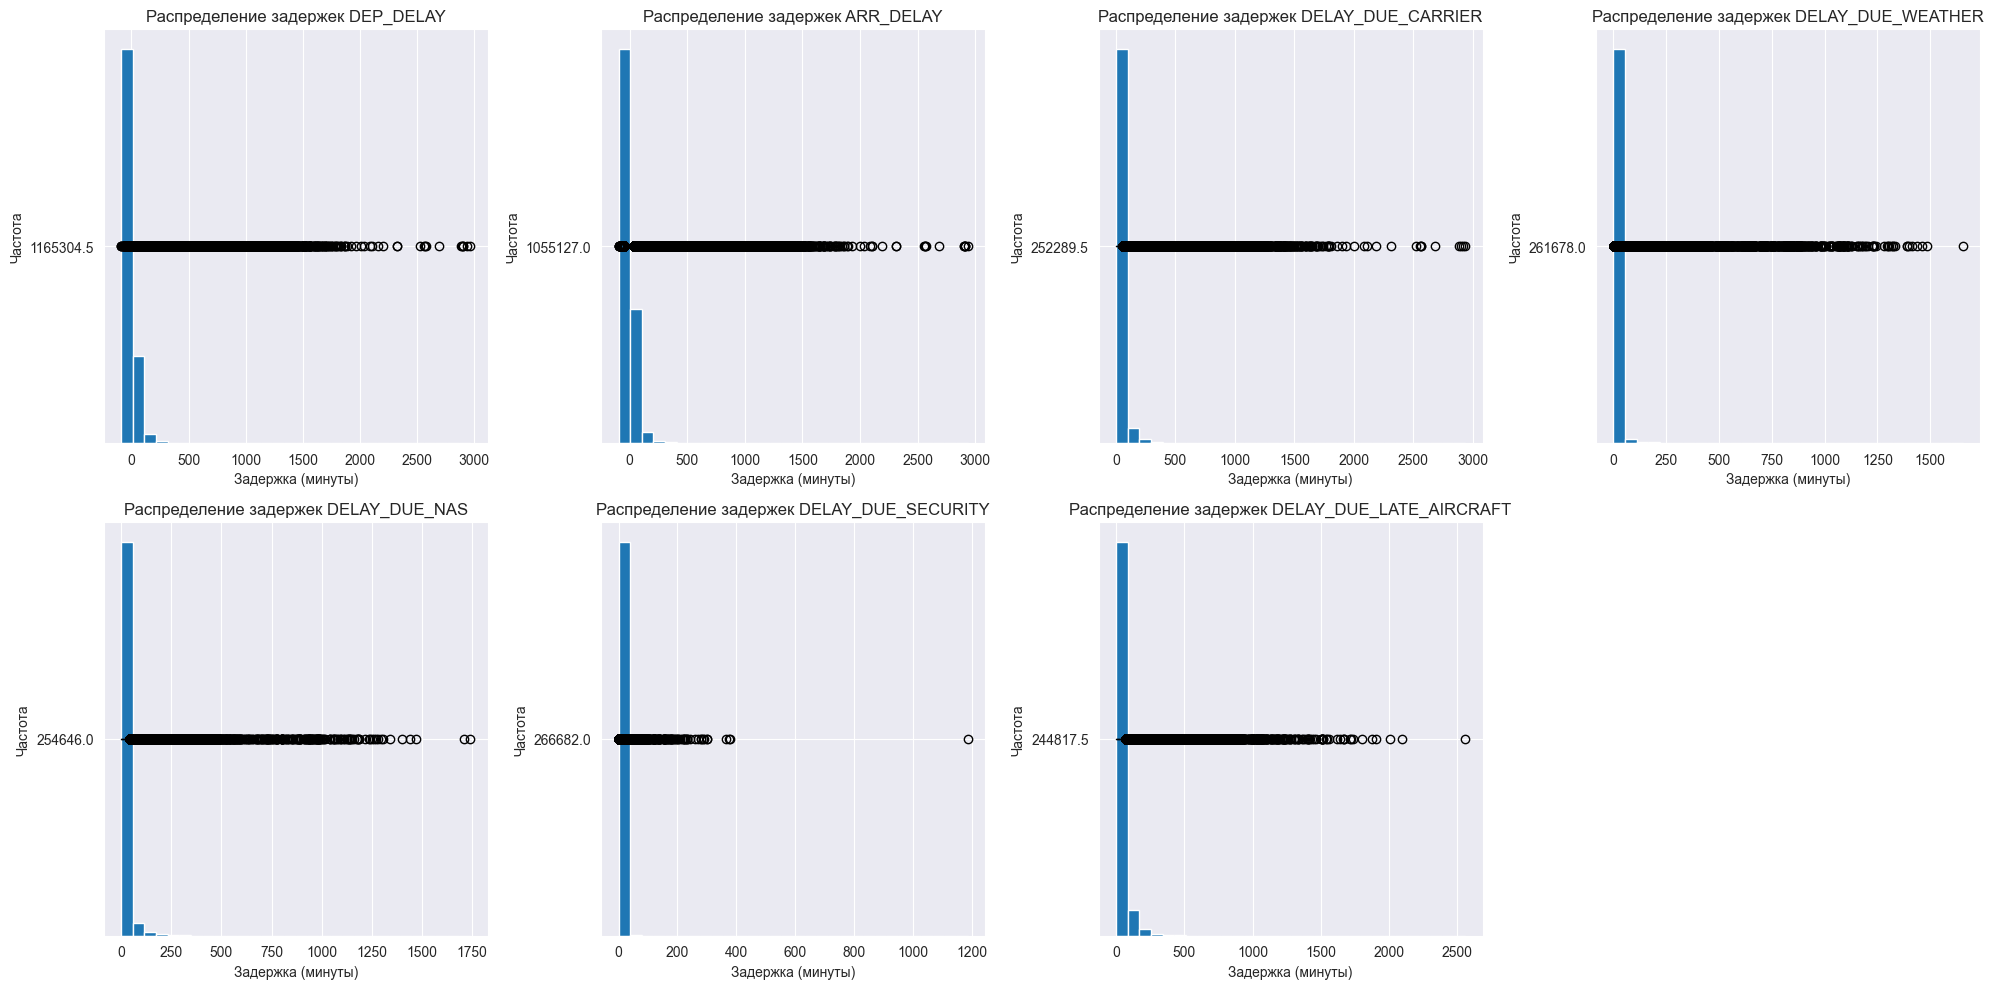

In [10]:
print("\nРаспределение задержек отправления:")
fig, ax = plt.subplots(figsize=(20, 10), ncols=4, nrows=2)
deley_cols = [col for col in df_flights.columns if 'DELAY' in col]
for i, col in enumerate(deley_cols):
    if 'DELAY' in col:
        x, y =  i // 4, i % 4
        count, bins, _ = ax[x, y].hist(df_flights[col], bins=30)
        pos = max(count) / 2
        ax[x, y].boxplot(df_flights[col].dropna(), vert=False, positions=[pos])
        ax[x, y].set_title(f"Распределение задержек {col}")
        ax[x, y].set_xlabel("Задержка (минуты)")
        ax[x, y].set_ylabel("Частота")
fig.delaxes(ax[1, 3])
plt.tight_layout()


Распределение задержек отправления:


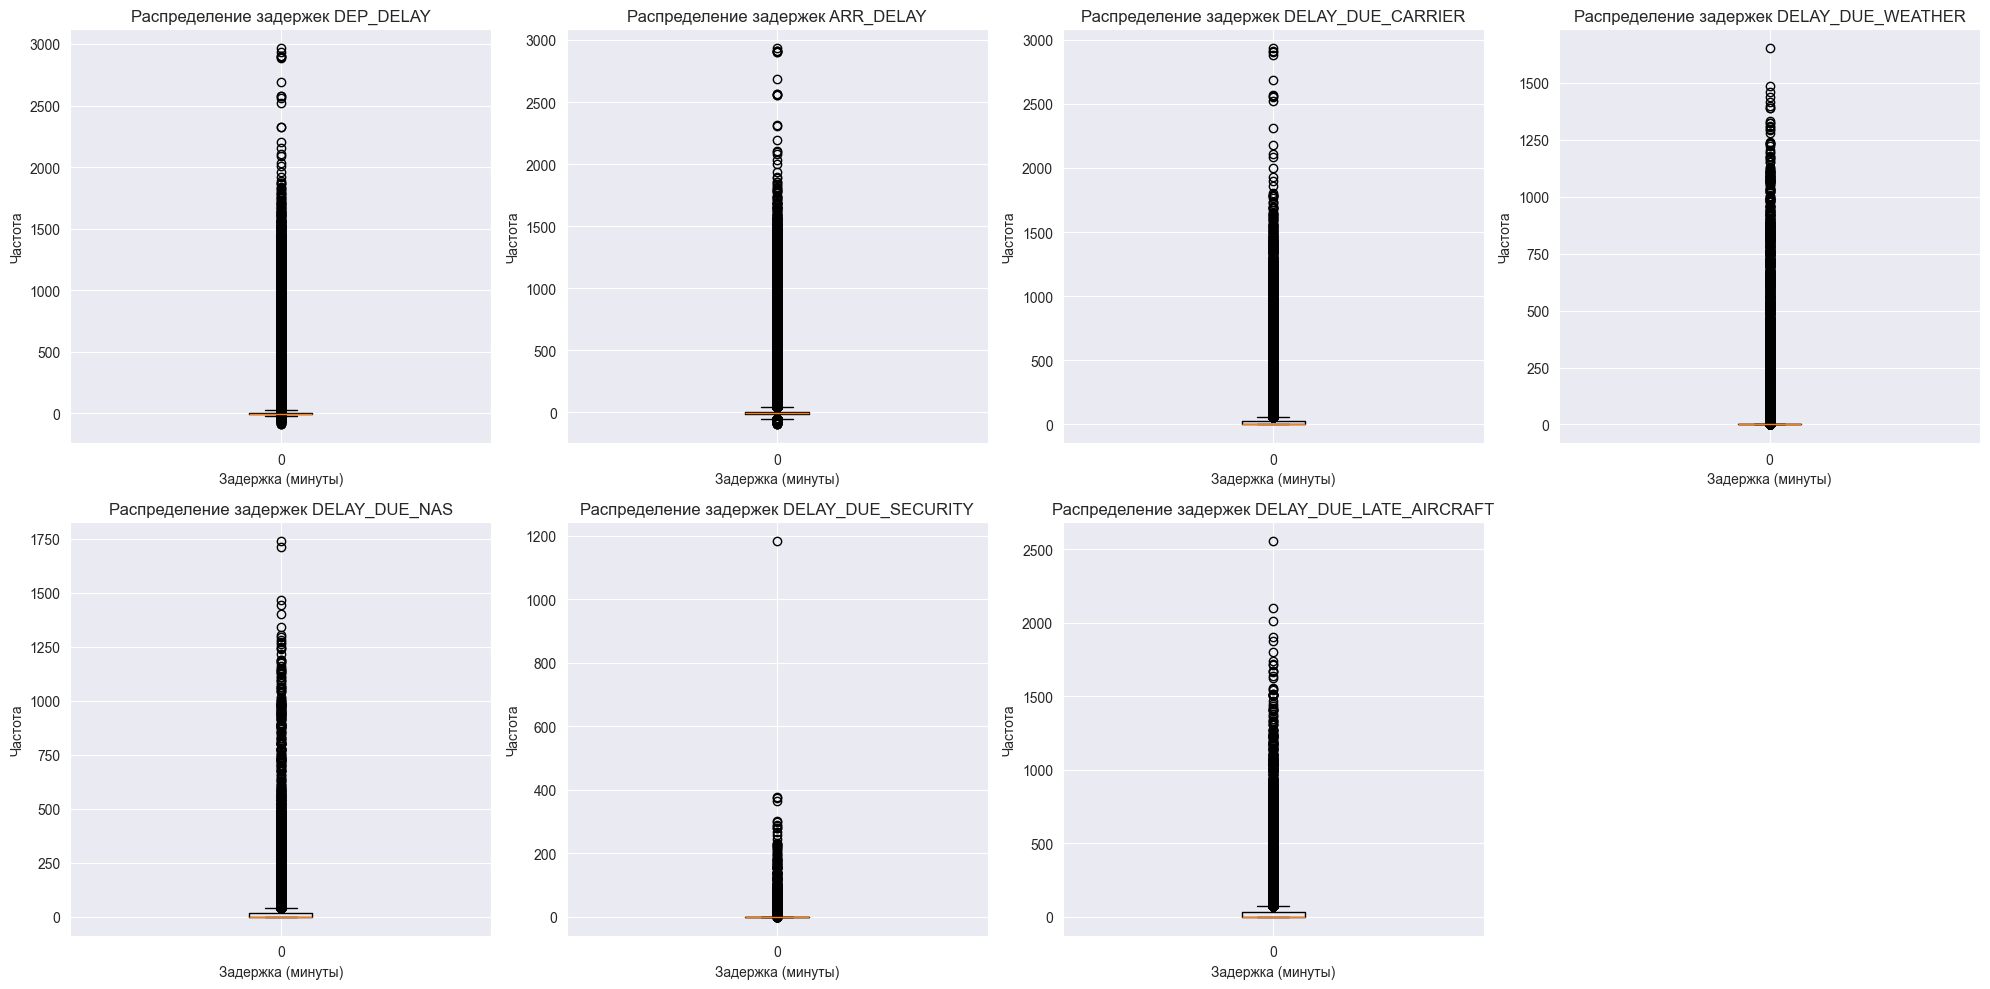

In [11]:
print("\nРаспределение задержек отправления:")
fig, ax = plt.subplots(figsize=(20, 10), ncols=4, nrows=2)
deley_cols = [col for col in df_flights.columns if 'DELAY' in col]
for i, col in enumerate(deley_cols):
    if 'DELAY' in col:
        x, y =  i // 4, i % 4
        ax[x, y].boxplot(df_flights[col].dropna(), positions=[0])
        ax[x, y].set_title(f"Распределение задержек {col}")
        ax[x, y].set_xlabel("Задержка (минуты)")
        ax[x, y].set_ylabel("Частота")
fig.delaxes(ax[1, 3])
plt.tight_layout()

In [12]:
df_flights.isnull()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True


Text(0.5, 1.0, 'Тепловая карта пропусков в данных')

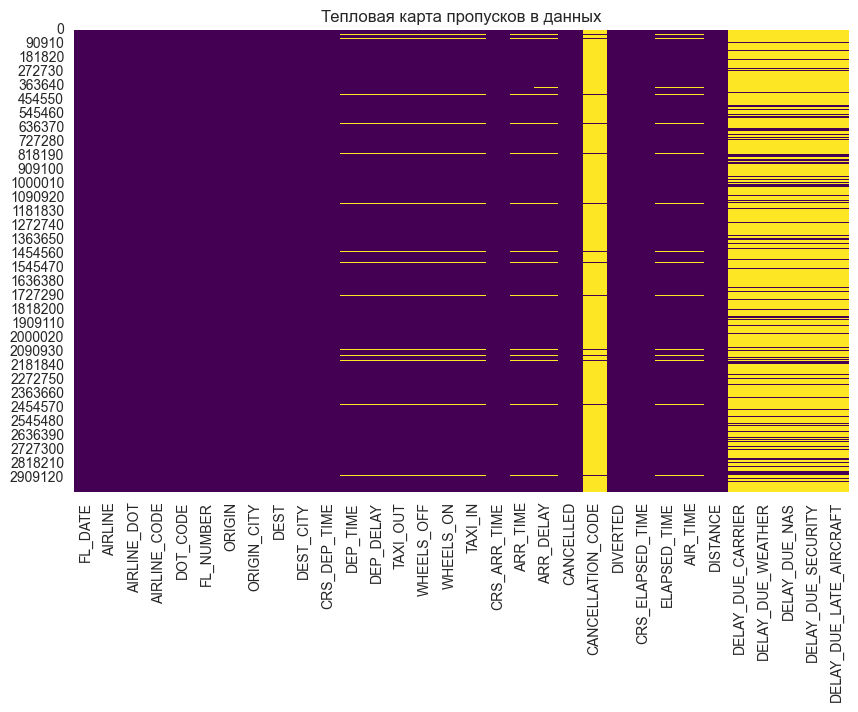

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_flights.isnull(), cbar=False, cmap='viridis')
plt.title("Тепловая карта пропусков в данных")

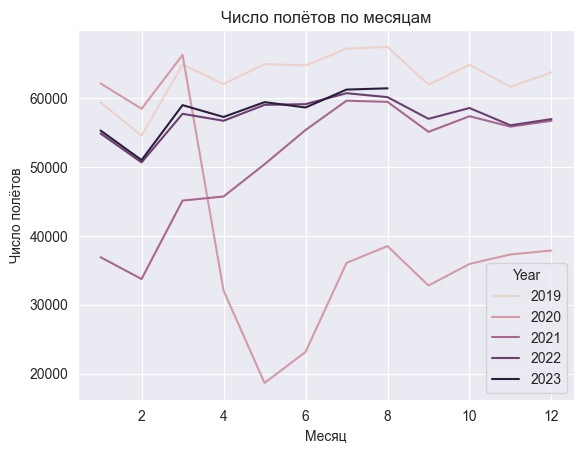

In [14]:
if 'FL_DATE' in df_flights.columns:
    df_flights['FL_DATE'] = pd.to_datetime(df_flights['FL_DATE'])
    df_flights['Month'] = df_flights['FL_DATE'].dt.month
    df_flights['Year'] = df_flights['FL_DATE'].dt.year

    monthly_flights = df_flights.groupby(['Year', 'Month']).size().reset_index(name='Flights')
    sns.lineplot(data=monthly_flights, x='Month', y='Flights', hue='Year')
    plt.title("Число полётов по месяцам")
    plt.xlabel("Месяц")
    plt.ylabel("Число полётов")
    plt.show()

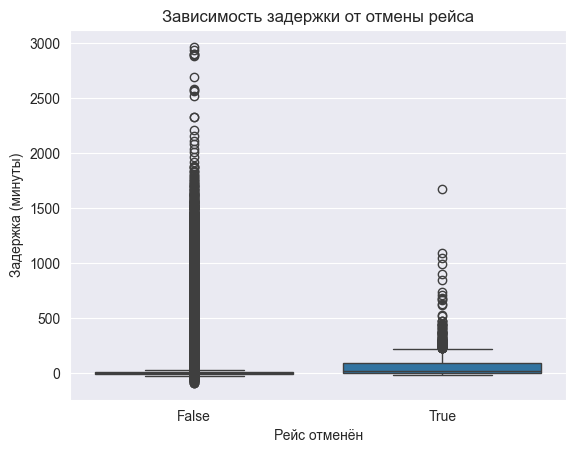

In [17]:
if 'DEP_DELAY' in df_flights.columns and 'CANCELLATION_CODE' in df_flights.columns:
    df_flights['Cancelled'] = df_flights['CANCELLATION_CODE'].notnull()
    sns.boxplot(data=df_flights, x='Cancelled', y='DEP_DELAY')
    plt.title("Зависимость задержки от отмены рейса")
    plt.xlabel("Рейс отменён")
    plt.ylabel("Задержка (минуты)")
    plt.show()

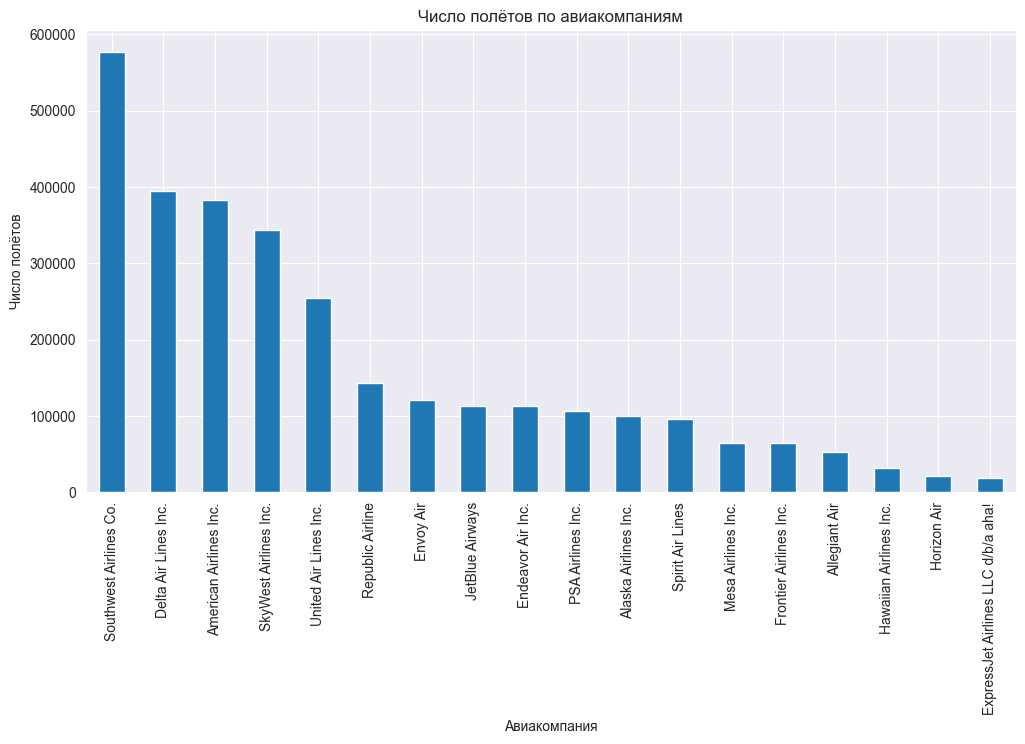

In [18]:
if 'AIRLINE' in df_flights.columns:
    airline_counts = df_flights['AIRLINE'].value_counts()
    airline_counts.plot(kind='bar', figsize=(12, 6))
    plt.title("Число полётов по авиакомпаниям")
    plt.xlabel("Авиакомпания")
    plt.ylabel("Число полётов")
    plt.show()

# Сохранение результата в файл (если потребуется)
# summary_path = "flights_data_summary.csv"
# flights_data.describe().to_csv(summary_path)
# print(f"Описательная статистика сохранена в {summary_path}")